# TOTO JE WORK-IN PROGRESS. Chybí většina plánovaného obsahu a to, co zde je, jsem po sobě ještě nepřečetl. Tudíž zde mohou být jak překlepy, tak zjevné nesmysly.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston, load_iris
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, KFold

import matplotlib.pyplot as plt
import seaborn as sns

# I. Příprava dat

## Načtení dat
Obvykle bychom data získali z nějakého csv souboru (obvykle s pomocí funkce pd.read_from_csv) anebo z databáze (zde se způsoby získání různí podle typu databáze). Nicméně v rámci zjednodušení celé situace, kdy je cílem mít stejná data k dispozici, ať už tento notebook spouští kdokoli odkudkoli, vypoužijeme data "na hraní", která jsou obsažená v balíčku sklearn. K těm se dostaneme pomocí funkcí load_XYZ, konkrétně load_boston a load_iris.  
Na následující buňce je vidět, že když chceme dostat pandí dataframe ("tabulkoidní" objekt), musíme si s výstupem load funkcí trochu pohrát. Zmíněné load funkce totiž vrací slovník, který obsahuje od sebe oddělené prediktory, jména prediktorů, cílové hodnoty a popis dat.  

In [2]:
boston_data_heap = load_boston()
boston_dataframe = pd.DataFrame(boston_data_heap["data"], columns=boston_data_heap["feature_names"])
boston_dataframe["target"] = pd.Series(boston_data_heap["target"])

iris_data_heap = load_iris()
iris_dataframe = pd.DataFrame(iris_data_heap["data"], columns=iris_data_heap["feature_names"])
iris_dataframe["target"] = pd.Series(iris_data_heap["target"])

Podívejme se, co vlastně námi vyrobené dataframy obsahují. Začněme přeci jen jednodušším iris_dataframe. V něm se nalézají "provařená" data týkající se delký a šířky ovětních lístků u tří druhů kosatců (viz [wiki](https://en.wikipedia.org/wiki/Iris_flower_data_set)). Pokud si z přírodovědy pamatujete stejně málo jako já, tak sepal je ten zelený lístkoidní obal květu a petal barevný lístek květu samotného. Nula ve sloupci target znamená, že konkrétní exemplář rostliny byl iris setosa, jednička značí iris versicolor a dvojka iris verginica.  

In [3]:
iris_dataframe.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
30,4.8,3.1,1.6,0.2,0
49,5.0,3.3,1.4,0.2,0
38,4.4,3.0,1.3,0.2,0
14,5.8,4.0,1.2,0.2,0
48,5.3,3.7,1.5,0.2,0
139,6.9,3.1,5.4,2.1,2
104,6.5,3.0,5.8,2.2,2
21,5.1,3.7,1.5,0.4,0
86,6.7,3.1,4.7,1.5,1
115,6.4,3.2,5.3,2.3,2


DataFrame boston_dataframe obsahuje již pár desetiletí neaktuální ceny nemovitostí na předměstích Bostonu. Význam jednotlivých sloupců je následující:  
- CRIM: per capita crime rate by town  
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.  
- INDUS: proportion of non-retail business acres per town  
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- NOX: nitric oxides concentration (parts per 10 million)  
- RM: average number of rooms per dwelling  
- AGE: proportion of owner-occupied units built prior to 1940  
- DIS: weighted distances to five Boston employment centres  
- RAD: index of accessibility to radial highways  
- TAX: full-value property-tax rate per \$10,000  
- PTRATIO: pupil-teacher ratio by town  
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
- LSTAT: \% lower status of the population  
- target: Median value of owner-occupied homes in \$1000's  


In [4]:
boston_dataframe.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
227,0.41238,0.0,6.20,0.0,0.504,7.163,79.9,3.2157,8.0,307.0,17.4,372.08,6.36,31.6
189,0.08370,45.0,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39,34.9
253,0.36894,22.0,5.86,0.0,0.431,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8
430,8.49213,0.0,18.10,0.0,0.584,6.348,86.1,2.0527,24.0,666.0,20.2,83.45,17.64,14.5
166,2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
43,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44,24.7
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27,19.8
428,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,24.0,666.0,20.2,96.73,21.52,11.0
208,0.13587,0.0,10.59,1.0,0.489,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66,24.4
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Prvotní seznámení s daty

Než budeme s daty jakkoli manipulovat, bylo by dobré si je prohlédnout. Jednak kvůli zjištění jejich kvality (např. jde o počet NULL hodnot), jednak pro to, abychom lépe porozuměli jednotlivým prediktorům. Pro takovéto operace je velmi užitečný balíček [pandas-profiling](https://github.com/pandas-profiling/pandas-profiling). Nicméně raději zde ony kontrolní operace uděláme ručně. Data jsou koneckonců vcelku jednoduchá a hlavně s reportem, které pandas-profiling vyrábí, by velikost notebooku vyrostla více, než by bylo záhodno.  

Funkce info nám ukazuje, že ani v jednom datasetu není žádná NULL hodnota. Dokonce zde není ani žádná kategorická veličina uložená jako string, na kterou bychom museli vypustit one-hot encoding (de facto převod stringové hodnoty na integer). Nicméně vzhledem k nutnosti ošetření těchto situací, které u normálních neučesaných dat takřka vždy vzniknou, se těmto problémum budeme zakrátku věnovat na fakeových datech.

In [5]:
iris_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [6]:
boston_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Interpretace čísel u tabulky kosatců je krystalicky jasná. Nejprve si uděláme shrnující statistiky. Jelikož se nám zde ale dohromady slévá více tříd (více typů kytek), nemá cenu příliš bádat nad průměrnou hodnotou prediktorů. Nicméně užitečné je zkontrolovat, jak si stojí průměr/medián vzhledem k maximu a minimu a ony nejsou ulítlé. To by znamenalo přítomnost outlieru a potřebu s ním nějak pracovat (třeba záznam s ním vyhodit, pakliže byl outlier způsoben překlepem při zápisu parametrů rostliny).  

In [7]:
iris_dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Užitečné je v tomto kontextu podívat se na statistiky pro jednotlivé třídy. Npříklad z tabulky níže vidíme, že kosatec typu 0 se jasně odlišuje od zbylých dvou, které mají parametry mnohem podobnější.

In [8]:
iris_dataframe.groupby("target").agg(
    sepal_length_mean=("sepal length (cm)", np.mean),
    sepal_length_std=("sepal length (cm)", np.std),
    sepal_width_mean=("sepal width (cm)", np.mean),
    sepal_width_std=("sepal width (cm)", np.std),
    petal_length_mean=("petal length (cm)", np.mean),
    petal_length_std=("petal length (cm)", np.std),        
    petal_width_mean=("petal width (cm)", np.mean),
    petal_width_std=("petal width (cm)", np.std),
)

,sepal_length_mean,sepal_length_std,sepal_width_mean,sepal_width_std,petal_length_mean,petal_length_std,petal_width_mean,petal_width_std
target,,,,,,,,
0,5.006,0.352490,3.428,0.379064,1.462,0.173664,0.246,0.105386
1,5.936,0.516171,2.770,0.313798,4.260,0.469911,1.326,0.197753
2,6.588,0.635880,2.974,0.322497,5.552,0.551895,2.026,0.274650


Nicméně asi lepší bude vizualizace (pro úsporu místa tu ukazuji jen první obrázek ze čtyř).

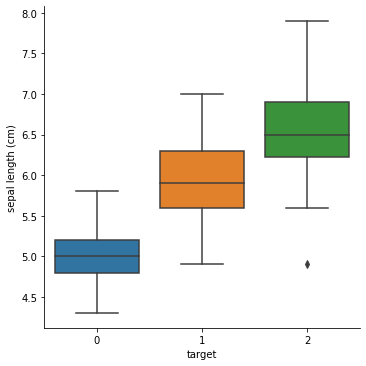

In [9]:
sns.catplot(x="target", y="sepal length (cm)", data=iris_dataframe, kind="box")

Podívejme se ale nyní na data nemovitostí.  
Nejprve se podívejme na základní statistiky. Jelikož se v cílovém sloupci nevyskytují kategorie, ale spojité hodnoty, nemá smysl se pokoušet o grupování.

In [10]:
boston_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Pro prohlédnutí si závislosti prediktoru na cílové hodnotě bude v tomto případě lepší než boxplot scatterplot. Například u kriminality vidíme, že s jejím růstem se pojí pokles cen. Samozřejmě to může znamenat jak to, že oblasti s kriminalitou nejsou na realitním trhu příliš atraktivní, anebo to, že se do levných lokalit stěhují lidé, kteří mají problémy se zákonem, anebo možná existuje nějaká třetí okolnost, od které jsou odvislé jak kriminalita, tak nízká cena.

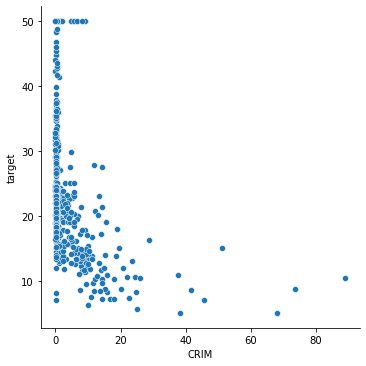

In [11]:
sns.relplot(x="CRIM", y="target", data=boston_dataframe, kind="scatter")

Jinými slovy "korelace není kauzaliza". Nicméně když se tu už o korelaci bavíme, bývá užitečné si ji taktéž spočítat. Obecně by bylo ideální, kdyby každý prediktor korelovat s cílovým sloupcem co možná nejvíce, ale jednotlivé prediktory mezi sebou nekorelovaly. V takovém případě totiž některé algoritmy začnou podávat horší výkon. Řešením tohoto problému může být např. PCA neboli přetvoření většího počtu částečně korelovaných prediktorů v menší počet prediktorů nekorelovaných. Nepříjemná však poté bývá skutečnost, že nové prediktory nejsou z businessového hlediska dost dobře interpretovatelné.  
Zdůrazněme nakonec, že tu celou dobu budeme mít na mysli korelaci lineární.

In [12]:
boston_dataframe.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Většina prediktorů vypadá dle popisu lineárně anebo se jedná o prediktory binární (tj. nabývající pouze hodnot 0 a 1). Výjimkou je veličina B, která poněkud netriviálně závisí na populaci afroameričanů v daném předměstí.

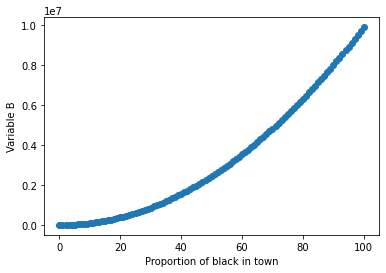

In [13]:
x_axis = list(range(0,101))
y_axis = [(1000*(x - 0.63)*(x - 0.63)) for x in x_axis]
plt.scatter(x_axis, y_axis)
plt.xlabel("Proportion of black in town")
plt.ylabel("Variable B");

## Nahrazování NA hodnot
Jak již bylo řečeno, v datech žádné díry (NA/NaN/nully) nemáme. Co bychom ale měli udělat, když by tam byly? Asi nejjednodušším řešením je takové záznamy vyhodit. To si ale můžeme dovolit pouze v případě, kdy je jich velice málo a jsme si jistí, že se jedná o důsledek nějaké nesystematické chyby (např. přepis dat z papírů do počítače).  
Vyhazování se realizuje funkcí pandas.dropna. Parametrem axis specifikujeme, zda se budou vyhazovat řádky(0) či sloupce (1) NaN obsahující. Parametr how říká, zda k vyhození stačí jedna v řádku/sloupci absentující hodnota ("any") či zda musí absentovat všechny("all").

In [14]:
emental_dataframe = pd.DataFrame([
                        [np.nan, 2, np.nan, 0],
                        [3, 4, np.nan, 1],
                        [np.nan, np.nan, np.nan, 5],
                        [np.nan, 3, np.nan, 4],
                        [1, 3, 2, 4],
                        ],
                        columns=list('ABCD'))
emental_dataframe

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4
4,1.0,3.0,2.0,4


In [15]:
emental_dataframe.dropna(axis=0, how="any")

,A,B,C,D
4,1.0,3.0,2.0,4


V některých případech víme, že Null hodnota businessově znamená číslo nula. Jindy se zase jedná o překlep a tudíž by se na ono míst měla vložit průměrná hodnota sloupce. K tomu slouží funkce pandas.fillna. Ta opět potřebuje specifikovat, yda chceme doplňovat prázdná pole podle sloucpů či řádků (parametr axis) a poté i doplňovanou hodnotu.

In [16]:
emental_dataframe["A"] = emental_dataframe[["A"]].fillna(
    axis=1,
    value=np.mean(emental_dataframe["A"])
)
emental_dataframe

,A,B,C,D
0,2.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,2.0,NaN,NaN,5
3,2.0,3.0,NaN,4
4,1.0,3.0,2.0,4


## One-hot encoding
One-hot encoding budeme demonstrovat na pro ten účel vzniklé kopii kosatcového dataframu. Tu si vytvoříme pomocí metody copy navázaná na zmíněný dataframe. Tímto způsobem získáme hard a ne shallow kopii. To znamená, že opravdu vzniká nový dataframe a nikoli jen nová reference na stejná podkladová data. V následujícím kroku totiž budeme dataframe upravovat a nechceme, aby se změny propsaly do originální tabulky.  
Představme si, že by sloupec target nebyl sloupcem cílovým, nýbrž by se jednalo pouze o jeden z řady prediktorů. V takovém případě bychom tento kategorický sloupec musely převést na trojici sloupců říkajících, zda je daný exemplář rostliny typu setosa, versicolor či verginica. Aby byla situace ještě názornější, změníme napřed hodnoty v target sloupci z čísla na odpovídající textový řetězec a to sice s použitím loc.  
Zdůrazněme, že u cílového sloupce takováto operace nedává žádný smysl. U něj se očekává, že v něm budou integery zastupujícící všechny třídy. Dokonce by zde ani nevadilo, kdyby třídy byly vyjádřeny stringy - ML algoritmy z sklearnu by se s tím měly popasovat.

In [17]:
encoding_iris = iris_dataframe.copy()
encoding_iris.loc[encoding_iris["target"]==0, "target"] = "iris setosa"
encoding_iris.loc[encoding_iris["target"]==1, "target"] = "iris versicolor"
encoding_iris.loc[encoding_iris["target"]==2, "target"] = "iris verginica"
encoding_iris.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
109,7.2,3.6,6.1,2.5,iris verginica
99,5.7,2.8,4.1,1.3,iris versicolor
6,4.6,3.4,1.4,0.3,iris setosa
38,4.4,3.0,1.3,0.2,iris setosa
93,5.0,2.3,3.3,1.0,iris versicolor
30,4.8,3.1,1.6,0.2,iris setosa
92,5.8,2.6,4.0,1.2,iris versicolor
148,6.2,3.4,5.4,2.3,iris verginica
44,5.1,3.8,1.9,0.4,iris setosa
15,5.7,4.4,1.5,0.4,iris setosa


Jak tedy převod jednoho sloupce stringového na tři sloupce binární provedeme? Nejprve si vytvoříme one hot encoderovský objekt. U něho posléze zavoláme jeho metodu fit_transform. Té jako parametr předáme sloupec původní tabulky, na němž chceme one-hot encoding provést. Nakonec je třeba tabulku původní a nové sloupce na sebe nalepit. To provedeme pomocí funkce pandas.concat. Ta zde pravda vypadá trochu strašidelně. Tato funkce dostává dva parametry - prvním je list na sebe lepených dataframů, druhým je axis říkající, zda se ony dataframy budou lepit jeden pod druhý (tj. přibudou řádky), anebo jeden vedle druhého (tj. přibudou sloupce). My chceme pro stejný počet řádků mít více sloupců, volíme tudíž hodnotu parametru axis rovnou jedné.  
Nicméně abychom mohli produkt one-hot encoderu vložit do listu dataframů, musíme z něj dataframe napřed udělat. Výstupem funkce fit_transform je totiž pouze numpy.array. Jeho převod je naštěstí jednoduchý - stačí ho vložit do konstruktoru pandího dataframu. Do tohoto konstruktoru navíc vložíme i jména nových sloupců, které encoder též poskytuje.  

In [18]:
normal_encoder = OneHotEncoder()
transformed_flower_name = normal_encoder.fit_transform(encoding_iris[["target"]])
whole_table = pd.concat(
    [
        encoding_iris, 
        pd.DataFrame(
            transformed_flower_name.toarray(), 
            columns=normal_encoder.get_feature_names().tolist()
        )
    ], 
    axis=1
)
whole_table.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,x0_iris setosa,x0_iris verginica,x0_iris versicolor
89,5.5,2.5,4.0,1.3,iris versicolor,0.0,0.0,1.0
130,7.4,2.8,6.1,1.9,iris verginica,0.0,1.0,0.0
68,6.2,2.2,4.5,1.5,iris versicolor,0.0,0.0,1.0
111,6.4,2.7,5.3,1.9,iris verginica,0.0,1.0,0.0
117,7.7,3.8,6.7,2.2,iris verginica,0.0,1.0,0.0
1,4.9,3.0,1.4,0.2,iris setosa,1.0,0.0,0.0
96,5.7,2.9,4.2,1.3,iris versicolor,0.0,0.0,1.0
69,5.6,2.5,3.9,1.1,iris versicolor,0.0,0.0,1.0
124,6.7,3.3,5.7,2.1,iris verginica,0.0,1.0,0.0
109,7.2,3.6,6.1,2.5,iris verginica,0.0,1.0,0.0


Všimněme si jmen nových sloupců. V jejich druhé části je jméno kategorie, část první se ale skládá z nejasného "x0". Co dělat, když chceme "x0", "x1" atd. nahradit za jména původních encodovaných sloupců? V takovém případě se musí do funkce get_feature_name vložit seznam sloupců encodovaného dataframu:

In [19]:
normal_encoder = OneHotEncoder()
transformed_flower_name = normal_encoder.fit_transform(encoding_iris[["target"]])
whole_table = pd.concat(
    [
        encoding_iris, 
        pd.DataFrame(
            transformed_flower_name.toarray(), 
            columns=normal_encoder.get_feature_names(encoding_iris[["target"]].columns).tolist()
        )
    ], 
    axis=1
)
whole_table.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_iris setosa,target_iris verginica,target_iris versicolor
89,5.5,2.5,4.0,1.3,iris versicolor,0.0,0.0,1.0
76,6.8,2.8,4.8,1.4,iris versicolor,0.0,0.0,1.0
46,5.1,3.8,1.6,0.2,iris setosa,1.0,0.0,0.0
117,7.7,3.8,6.7,2.2,iris verginica,0.0,1.0,0.0
58,6.6,2.9,4.6,1.3,iris versicolor,0.0,0.0,1.0
52,6.9,3.1,4.9,1.5,iris versicolor,0.0,0.0,1.0
77,6.7,3.0,5.0,1.7,iris versicolor,0.0,0.0,1.0
73,6.1,2.8,4.7,1.2,iris versicolor,0.0,0.0,1.0
145,6.7,3.0,5.2,2.3,iris verginica,0.0,1.0,0.0
100,6.3,3.3,6.0,2.5,iris verginica,0.0,1.0,0.0


Zamysleme se ještě nad výstupem encoderu. Z tabulky vidíme, že tři sloupce s jedničkami a nulami jsou zbytečné. Jamkile totiž známe hodnoty ve dvou sloupcích, snadnou úvahou dojdeme i k hodnotám ve sloupci třetím. Ještě markantnější to je v případě, kdy byl původní encodovaný sloupec binární. Zdůrazněme, že toto není pouze problém estetický, ale i praktický - některé algoritmy, například lineární regrese bez regularizace, by s takovýmito daty měli problém.  
Jak takovouto situaci ošetřit? Do konstruktoru encoderu vložíme parametr drop s hodnotou buďto first anebo if_binary. "first" vyhodí první kategorii (a to i pokud je ve sloupci jen jedna kategorie), "if_binary" proveden takovéto vyhazování pouze pokud jsou ve zdrojovém sloupci dvě kategorie.

In [20]:
normal_encoder = OneHotEncoder(drop="first")
transformed_flower_name = normal_encoder.fit_transform(encoding_iris[["target"]])
whole_table = pd.concat(
    [
        encoding_iris, 
        pd.DataFrame(
            transformed_flower_name.toarray(), 
            columns=normal_encoder.get_feature_names().tolist()
        )
    ], 
    axis=1
)
whole_table.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,x0_iris verginica,x0_iris versicolor
53,5.5,2.3,4.0,1.3,iris versicolor,0.0,1.0
110,6.5,3.2,5.1,2.0,iris verginica,1.0,0.0
148,6.2,3.4,5.4,2.3,iris verginica,1.0,0.0
124,6.7,3.3,5.7,2.1,iris verginica,1.0,0.0
105,7.6,3.0,6.6,2.1,iris verginica,1.0,0.0
82,5.8,2.7,3.9,1.2,iris versicolor,0.0,1.0
77,6.7,3.0,5.0,1.7,iris versicolor,0.0,1.0
120,6.9,3.2,5.7,2.3,iris verginica,1.0,0.0
135,7.7,3.0,6.1,2.3,iris verginica,1.0,0.0
136,6.3,3.4,5.6,2.4,iris verginica,1.0,0.0


Hodnotami v encodovaném sloupci musí být čísla či stringy, ne však None. Tudíž následující kód by skončil chybou:
```python
encoding_iris.loc[0,"target"] = None

normal_encoder = OneHotEncoder()
transformed_flower_name = normal_encoder.fit_transform(encoding_iris[["target"]])
```

Poznámka závěrem - ve starších verzích sklearnu (tuším před verzí 0.20) požadoval OneHotEncoder na vstupu sloupec s integrery. Když měl tak člověk sloupec se stringy, musel je navíc převést na čísla pomocí LabelEncoderu. Nyní už to naštěstí není potřeba, nicméně člověk by na to měl myslet, když musí pracovat se zastaralými verzemi knihoven.

A nakonec ještě jedna poznámka, snad už opravdu poslední. Na první pohled stejného výsledku by se dalo dosáhnout i pomocí pandasí funkce get_dummies. One-hot encoder má tu výhodu, že přetrvá i po prvním použití a dá se použít na transformaci dalších dat. Uvažme situaci, kdy bychom natrénovali model, od něhož bychom očekávali online predikci, kdy na jeho vstup dorazí jeden záznam za čas. V takovém případě get_dummies nebude vědět, jak má kategorii zpracovat, zatímco encoder si to bude pamatovat z trénování.

## Train-test splitting a K-folding
Dejme tomu, že máme připravený dataframe a chceme na něj vypustit nějaký machine-learningový algoritmus. Abychom mohli posoudit, zda onen alogritmus pracuje správně, vyčleníme z dat několik náhodně vybraných záznamů - obvykle 20% či 10%. O této menší části dat hovoříme jako o testovací množině dat, zatímco zbytek spadá do trénovací množiny. S její pomocí natrénujeme ML model. Posléze vezmeme featury z vyčleněných záznamů, model předpoví targety a ty porovnáme s target sloupcem trénovací množiny. O tom více v sekcích věnovaných alogritmům.  
Nyní vyvstává otázka, jak rozdělit data na trénovací a testovací. Nejjednoduššeji to jde s metodou train_test_split. Ta dostává na vstup sekvenci listů či pandích dataframů/sérií. Ty musí mít stejný počet prvků - to v případě kombinace listu a dataframu znamená, že počet prvků listu se musí rovnat počtu řádku dataframu. Další parametr - test_size - udává procentuální zastoupení trénovací množiny. Funkce každý vstupní element rozdělí na dva právě podle tohoto čísla. Zdůrazněme, že datový typ je zachován, tj. z dataframu vzniknou dataframy, ze serie série, z listu listy.

In [21]:
train_features, test_features, train_target, test_target = \
    train_test_split(iris_dataframe.drop("target", axis=1), iris_dataframe["target"], test_size=0.2)
print(f"Shape of original dataframe: {iris_dataframe.shape}")
print(f"Shape of train_features: {train_features.shape}")
print(f"Shape of test_features: {test_features.shape}")
print(f"Shape of train_target: {train_target.shape}")
print(f"Shape of test_target: {test_target.shape}")

Shape of original dataframe: (150, 5)
Shape of train_features: (120, 4)
Shape of test_features: (30, 4)
Shape of train_target: (120,)
Shape of test_target: (30,)


Jak je vidno z indexu dataframu, funkce train_test_split provádí náhodné rozdělení defaultně.

In [22]:
train_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
21,5.1,3.7,1.5,0.4
133,6.3,2.8,5.1,1.5
118,7.7,2.6,6.9,2.3
116,6.5,3.0,5.5,1.8
132,6.4,2.8,5.6,2.2


Občas pouhopouhé rozdělení dat na trénovací a testovací nestačí. U určité algoritmy totiž nemají jen parametry, jejichž hodnoty model určí při trénování, ale i tzv. hyperparametry, které musí být určeny zvnějšku. Typické je to u "ensamble" algoritmu, které se skládají z hromady jednoduchých ML argoritmů, které o výsledné predikci pro ten který konkrétní záznam hlasují. Jedním z hyperparametrů takovýchto algoritmů je právě počet hlasujících. Pokud bychom zůstali v train-test modu, ladili bychom ony hyperparametry podle testovací množiny. Tato testovací množina by poté neměla význam pro konečné stanovení přenosti modelu, neboť jsme ji použili při samotném trénování modelu.  
Co se tedy musí udělat? Původní data se rozdělí na trénovací a testovací. Trénovací data čeká ale další dělení na "subtrénovací" a validační množinu. Měníme hyperparametry, trénujeme model na subtrénovací množině a jeho prediktivní sílu určujeme jeho aplikací na validační množinu. Když jsme spokojeni (myšleno našli jsme optimální hodnotu hyperparametrů), natrénujeme model ještě jednou - tentokrát jsou trénovacími daty opravdu celá trénovací data (tj. subtrénovací i validační množina dohromady). Prediktivní síla získaná použitím modelu na testovací množinu se pak už může porovnávat s modely ostatními.  
Problém tohoto postupu je skutečnost, že subtrénovací množina i množina validační jsou poměrně malé. Rosté tak vliv outlierů. Proto natrénování modelu na jedné validační množině nestačí - co kdyby v oné validační množině byl zrovna outlier, který zkazí statistiky optimálního modelu? Řešením je aplikace k-foldingu. Tehdy je prvotní trénovací množina rozdělena na k (nejčastěji k=10 či k=5) stejně velkých částí. Z nichž první až devátá část vytvoří subtrénovací množinu, desátá část validační množinu. Na těhcto datech se natrénuje model a získají se jeho statistiky. Posléze se na sformování subtrénovací množiny vezmou druhá a desátá část, validační množinu tvoří část první. Opět následuje trénování modelu a sběr statistik. Během deseti iterací se části prostřídají, tj. každá jednou funguje jako validační množina. Výsledná statistka pro konkrétní hyperparametr se pak vezme jako průměr deseti statistik z oněch proběhlých deseti iterací.  
Jak s k-foldingem prakticky pracovat? Nejprve se musí vytvořit instace KFold objektu. Do konstruktoru se vloží počet částí, na které se vstupní data rozdělí (parametr n_splits), a to, zda chceme, aby byly záznamy do jednotlivých částí vloženy náhodně (shuffle=True) anebo popořadě (shuffle=False).  

In [23]:
k_fold = KFold(n_splits=10, shuffle=True)

Samotná instance nic moc nedělá. Musí se zavolat funkce split. Ta na základě datframu, který se jí předá jako parrametr, vytvoří posloupnosti indexů pro subtrénovací a validační množinu:

In [24]:
for train_indices, test_indices in k_fold.split(iris_dataframe):
    print(train_indices, test_indices)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  59  61  62  63  64  65  66  68  69  70  71  72  73  74
  75  76  77  79  80  81  82  83  85  86  87  88  89  90  91  92  93  94
  96  97  98  99 100 101 104 105 106 108 109 110 111 113 114 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 133 134 135 136 137
 138 139 143 144 145 146 147 148 149] [ 58  60  67  78  84  95 102 103 107 112 115 132 140 141 142]
[  0   1   3   4   5   6   7   8   9  10  11  12  13  15  16  18  19  20
  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  42  44  46  48  49  50  51  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  91  92  93  94  95  96  97  99 100 101
 102 103 105 106 107 108

Při faktickém použití by se pak tyto indexy v rámci for smyčky použily k vydělení záznamů z train dat vytvořených pomocí train_test_splitu:
```python
for train_indices, test_indices in k_fold.split(iris_dataframe):
    subtrain_train_features = train_features.iloc[train_indices]
    subtrain_test_features = train_features.iloc[test_indices]
    subtrain_train_target = train_target.iloc[train_indices]
    subtrain_test_target = train_target.iloc[test_indices]
    #ML algorithm
```

## Škálování
Představme si dataframe, ve kterém jsou dva predikční sloupce. V jednom je váha v kilogramech, v druhém délka v metrech. Existují algoritmy, pro které vstupní data v takovémto formátu nepředstavují problém (zejména se jedná o stromy a lesy). Většina algoritmů (neuronové sítě, K-means, ale třeba i regularizovaná lineární regrese...) s tím ale bude mít problém. Pokud bychom například v prediktorech měli výšku a váhu člověka, jak by mohl chudák počítač vědět, jestli jsi jsou podobnější záznamy o stejné výšce a váze lišící se o 1 kg, anebo záznamy o stejné váze a výšce lišící se o 1 m. A co kdyby výška nebyla v metrech, nýbrž třeba centimetrech? Proto se obvykle data škálují. Tím se myslí, že se hodnoty v jednom sloupci přepočítají tak, aby střední hodnota činila nulu a standardní odchylka byla rovná jedné. Díky tomu už budou hodnoty v sloupcích zastupujících odlišné věci provnatelné.  
V některých případech škálování není doporučované. Jde zejména o binární sloupce, tj. sloupce vytvořené pomocí one-hot encodingu a obsahující pouze jedničky a nuly.  
Podívejme se nejprve na to, jak vypadají data, na kterých budeme škálování zkoušet.

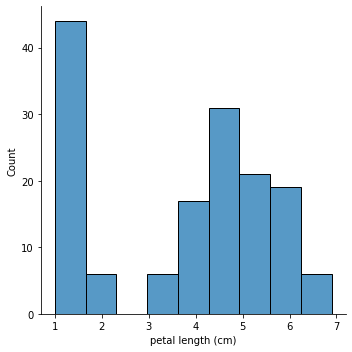

In [25]:
sns.displot(iris_dataframe["petal length (cm)"]);

Použijme nejprve StandardScaler. Vidíme, že data jsou nyní vycentrovaná na nule a i šířka oblasti, ve které je najdeme, je užší.

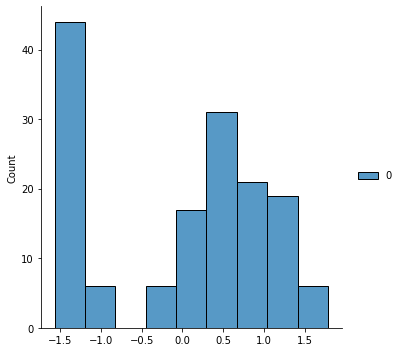

In [26]:
scaler_standard = StandardScaler()
pet_len_scaled_standard = scaler_standard.fit_transform(iris_dataframe[["petal length (cm)"]])
sns.displot(pet_len_scaled_standard);

Všimněte si, že byl vytvořen a nafitován scalovací objekt. Ten (resp. jeho metodu fit) bychom mohli použít na naškálování dalších dat. Toho se využívá při přípravě trénovacích a testovacích dat. Tyto dvě množiny dat totiž nemůžeme škálovat samosttně - v takoví případě by se totiž ztratila souvztažnost mezi daty, která existuje v neupravených hodnotách, ale která by byla vymazaná škálováním. Také není přípustné škálování dat před jejich rozdělením na trénovací a testovací množinu - v takoévm případě by testovací data mohla díky škálování ovlivnit podobu naškálovaných trénovacích dat a tudíž i modelu. Jediny správný postup je vytvořit škálovací objekt na základě trénovacích dat a tento objekt pak použít na naškálování jak trénovacích, tak testovacích záznamů.  
Ze škálovacího objektu můžeme dostat parametry původních dat, tj. střední hodnotu a varianci, resp. standardní odchylku:

In [27]:
print(f"Mean: {scaler_standard.mean_}")
print(f"Variance: {scaler_standard.var_}")
print(f"Standard deviation: {scaler_standard.scale_}")

Mean: [3.758]
Variance: [3.09550267]
Standard deviation: [1.75940407]


Díky uložení těchto parametrů je možné provést i inverzní transformaci:

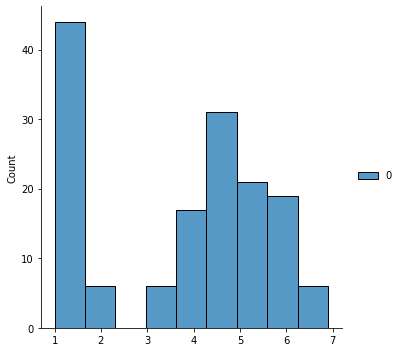

In [29]:
data_after_inverse = scaler_standard.inverse_transform(pet_len_scaled_standard)
sns.displot(data_after_inverse);

Existují i jiné škalovače neř ten založený na nulové střední hodnotě a jednotkové varianci. Například MinMaxScaler škáluje data tak, aby se při nezměněném tvaru jejich distribuce vešla mezi minimální a maximální hodnoty (defaultně 0 a 1). Škálování RubstScaleru je zase založeno na škálování na 25 a 75 percentil a tudíž je necitlivý na outliery. 

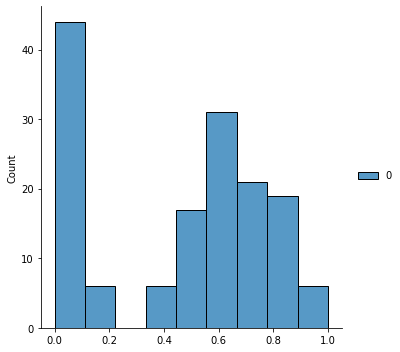

In [31]:
scaler_minmax = MinMaxScaler()
pet_len_scaled_minmax = scaler_minmax.fit_transform(iris_dataframe[["petal length (cm)"]])
sns.displot(pet_len_scaled_minmax);

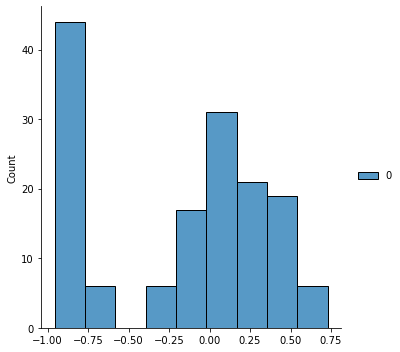

In [32]:
scaler_robust = RobustScaler()
pet_len_scaled_robust = scaler_robust.fit_transform(iris_dataframe[["petal length (cm)"]])
sns.displot(pet_len_scaled_robust);

Kdy použít které škálování? Popravdě nemám dostatek zkušeností, abych tady mohl vynášet nějaké finální soudy. Ale asi se dá říct, že když jsou data zatížená outliery, má se použít RobustScaler, když mají data normální rozložení, tak StandrdScaler, a v ostatních případech MinMaxScaler.

Zmiňme ještě krátce normalizaci. Tento termín se občas volně zaměňuje se škálováním. Nicméně Normalizer, který je v rámci sklearnu k dispozici, se svou funkčností odlišuje od škálovacích objektů zmíněných výše. Působí totiž nikoli na sloupce, ale na řádky. Fakticky provádí normalizaci vektorů jednotlivých záznamů viz příklad níže. Využití spočívá asi hlavně s manipulaci s textem, kdy jendotlivé dokumenty budou reprezentvány řádky v dataframu. 

In [33]:
column_1 = [1,2,1,0]
column_2 = [1,2,0,0]
column_3 = [1,2,0,0]
dataframe_for_norm = pd.DataFrame({
    "column_1": column_1,
    "column_2": column_2,
    "column_3": column_3,
})
dataframe_for_norm

,column_1,column_2,column_3
0,1,1,1
1,2,2,2
2,1,0,0
3,0,0,0


In [34]:
normalizer = Normalizer()
normalized_data = normalizer.fit_transform(dataframe_for_norm)
normalized_data

array([[0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

## Oversampling
Představme si situaci, kdy máme v trénovacích datech 990 záznamů třídy 0 a 10 záznamů třídy 1. V takovém případě bude pro ML algoritmus nejsnazší prohlásit o každém testovacím záznamu, že patří taky do třídy 0 - přeci jen se splete jen ve velice malém počtu případů. Problém ale nastává, když je pro nás správné rozpoznání třídy 1 kritické. Řešením je použití oversamplingu. Principielně jde o to, že ML algoritmu při trénování poskytneme více záznamů minortní třídy, než jich v datech je. To se dá realizovat nejsnáze náhodným výběrem z množiny trénovacích dat o minoritní třídě s nahrazením. Existují i jiné, porkočilejší postupy, např. SMOTE. Jeho principem je v kontrastu k opakovanému vytahování stejných záznamů u předchozí metody vytváření umělých nových záznamů. To je ale už za rámec tohoto materiálu.  
Pro realizaci onoho jednoduchého náhodného oversamplingu musíme importovat nový balíček - imblearn (=imbalanced learn), resp. jeho třídu RandomOverSampler. na instanci této třídy se zavolá metoda fit_resample obsahující prediktory a targety.  
Nejprve si ale připravme nevybalancovaná data.

In [35]:
iris_class_0 = iris_dataframe[iris_dataframe["target"]==0]
iris_class_1 = iris_dataframe[iris_dataframe["target"]==1]
iris_class_2 = iris_dataframe[iris_dataframe["target"]==2].sample(5)
iris_before_oversampling = pd.concat(
    [iris_class_0, iris_class_1, iris_class_2],
    axis=0
)
iris_before_oversampling["target"].value_counts()

1    50
0    50
2     5
Name: target, dtype: int64

Nyní realizujme uversampling.

In [36]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
features_resampled, target_resampled = ros.fit_resample(
    iris_before_oversampling.drop("target", axis=1),
    iris_before_oversampling["target"]
)

Když se nyní podíváme na resamplovaná data, vidíme, že záznamů s prediktory i s targety je 150 a všechny třídy jsou zaastoupeny stejně.

In [37]:
import collections 
print(f"Shape of resampled feature table: {features_resampled.shape}")
counter = collections.Counter(target_resampled)
counter

Shape of resampled feature table: (150, 4)


Counter({0: 50, 1: 50, 2: 50})

Zmiňme závěrem, že oversampling by se měl vypustit jen a pouze na data trénovací. Data testovací slouží na zjištění, jak se asi model bude chovat na reálných predikovaných záznamech a tudíž tato testovací data musí mít skutečnou distribuci predikovaných tříd.

# II. Algoritmy

### Lineární regrese
V případě lineární regrese se snažíme proložit trénovací záznamy alias body v N rozměrném prostoru vhodnou nadrovinou  
$f(x)=w_0 + \sum_{i=1}^{N-1} w_i x_i$  
Zde $w_i$ jsou váhy, $x_i$ jednotlivé prediktory záznamu a N-1 počet prediktorů. Pakliže má prostor dimenzi dva, tj. záznamy mají pouze jeden prediktor a cíl, znamená to, že v 2D grafu prokládáme body přímkou. Relativně rozumných přímek/nadrovin bychom ale mohli vyrobit povícero. Jak poznat, která z nich je ta správná? Používá se metodika založená na mnimalizaci kvadrátů reziduí:  
$\sum_{j=1}^n(y_j - f(x_j))^2$    
Reziduum je definované jako rozdíl hodnoty cíle a nadroviny po dosazení prediktorů záznamu, tj.  
$r_j = y_j - f(x_j)$  
Zde index j označuje jednotlivé záznamy alias body v grafu. V ideálním případě, kdy by všechny záznamy ležely na predikované nadrovině, by všechna rezidua byla nulová. Proč se musí minimalizovat suma jejich kvadrátu? Kdybychom minimalizovali sumu nijak neupravených reziduí, navzájem by se požíraly kladná a záporná residua. Tudíž je potřeba od nich odstranit znaménka. To se dá rovést například absolutní hodnotou, nebo právě kvadrátem. U něj bývá užitečné, že zdůrazňuje význam odlehlejších bodů. Samozřejmě to je výhodou pouze v případě, že ona odlehlé body jsou skutečné a nikoli outliery. Pokud nastane druhý případ, je nutné body vyhodit.  
Na co si dát korm outlierů pozor?
- lineární regrese je lineární. Proto snaha nafitovat dejme tomu parabolu pomocí funkce f(x) = $3x_1$+ $2x_2$ +3 nesknčí dobře. Samozřejmě si můžeme vyrobit další prediktor jako kvadrát původního prediktoru. Nicméně obvykle nevíme, zda/jak přesně nelineární závislost cíle na prediktorech je. Tudíž bychom museli pro každý prediktor i jejich kombinace dělam mocniny i odmocniny všelijakých řádů. Tím by se model zbytečně nafouknul do počtu prediktorů, jeho interpretovatelnost by poklesla a navíc by bylo explicitní přepočítávání prediktorů poněkud únavné.
- lineární regrese nemá rádá korelaci prediktorů. Samozřejmě je ideální, pokud všechny prediktory co nejvíce korelují s cílem .Pokud ale korelují mezi sebou navzájem, znamená no, že do modelu přinášejí navíc omezenou novou informaci. Pokud by korelovaly na 100 %, například v případě zkopírovaného prediktoru, byla by nová informace v případě kopie nulová. To by sice vadit nemuselo, meziprediktorová korelace má ale reálně negativní vlvi na model. Výpočet jednotlivých koeficientů nadroviny má totiž tendenci v takovýchto případech selhat.
- představme si, že máme 2D data, tj. jeden prediktor a jeden cíl. Hodnoty prediktoru jdou od 10 do 100. Na základě takovýchto dat vytvoříme model. Následně přijdou data k predikování, kde hodnota prediktoru bude kolem 1000. V takovém případě je model zjevně nepoužitelný, neboť se setkává s daty mimo svou oblast působnosti.

Nicméně jak bychom reálně lineární regresi provedli? Jedná se o regresní, nikoli klasifikační algoritmus, takže ji vypustíme na boston dataset. Data si nejprve naškálujeme. U čisté regrese to není bezpodmínečně nutné (narozdíl od lassa a ridge regrese - viz dále). Nicméně snáze díky tomu budeme moci interpretovat váhu jendotlivých prediktorů. 

In [38]:
train_feat_boston, test_feat_boston, train_target_boston, test_target_boston = \
    train_test_split(boston_dataframe.drop("target", axis=1), boston_dataframe["target"], test_size=0.2)
scaler_boston_minmax = MinMaxScaler()
train_scal_feat_boston = pd.DataFrame(
    scaler_boston_minmax.fit_transform(train_feat_boston),
    columns=train_feat_boston.columns
)
test_scal_feat_boston = pd.DataFrame(
    scaler_boston_minmax.transform(test_feat_boston),
    columns=test_feat_boston.columns
)

Zkontrolujme, jak je to s korelací mezi jednotlivými prediktory. No, žádná sláva to není. Vidíme kupříkladu, že značištění silně kladně koreluje s přítomností průmyslu, stářím budov či zaplacenými daněmi (za to primárně může spíš ten průmysl), silně negativně pak s vzdáleností od "Boston employment centres". Za normálních okolností bychom asi některé sloupce vyhodili anebo předtvořily pomocí PCA (Principal Component Analysis). Nyní ale sloupce ponecháme tak, jak jsou.

In [39]:
train_scal_feat_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.201203,0.405451,-0.060890,0.418381,-0.229982,0.349979,-0.387388,0.611908,0.571356,0.301235,-0.397990,0.458297
ZN,-0.201203,1.000000,-0.536488,-0.085375,-0.518662,0.295949,-0.573038,0.661969,-0.320823,-0.326408,-0.411267,0.172156,-0.408054
INDUS,0.405451,-0.536488,1.000000,0.103597,0.771936,-0.390192,0.643915,-0.717860,0.611597,0.746186,0.412711,-0.345577,0.603054
CHAS,-0.060890,-0.085375,0.103597,1.000000,0.131420,0.031175,0.112754,-0.123574,-0.033992,-0.040609,-0.132951,0.033984,0.005906
NOX,0.418381,-0.518662,0.771936,0.131420,1.000000,-0.286925,0.738222,-0.778873,0.624477,0.683601,0.223713,-0.372430,0.598574
RM,-0.229982,0.295949,-0.390192,0.031175,-0.286925,1.000000,-0.232511,0.211936,-0.237702,-0.316604,-0.370637,0.143468,-0.621009
AGE,0.349979,-0.573038,0.643915,0.112754,0.738222,-0.232511,1.000000,-0.753259,0.458388,0.514918,0.291103,-0.264508,0.598604
DIS,-0.387388,0.661969,-0.717860,-0.123574,-0.778873,0.211936,-0.753259,1.000000,-0.515597,-0.558887,-0.280660,0.289974,-0.506575
RAD,0.611908,-0.320823,0.611597,-0.033992,0.624477,-0.237702,0.458388,-0.515597,1.000000,0.911201,0.487877,-0.438864,0.512276
TAX,0.571356,-0.326408,0.746186,-0.040609,0.683601,-0.316604,0.514918,-0.558887,0.911201,1.000000,0.483777,-0.437325,0.571510


Realizujme nyní samotné fitování modelu. Konstruktor pro lineární regresi narozdíl od modelů zmíněných dále moc parametrů neobsahuje. Je mezi nimi sice možnost automaticky prediktory naškálovat, ale dokumentace stejně doporučuje provést škálování separátně. Samotné učení se modelu se realizuje pomocí metody fit, která dostává jako parametry jednak sadu prediktorů, jednak cíl.

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()
lin_reg_model.fit(train_scal_feat_boston, train_target_boston)

LinearRegression()

Jakmile je model nafitován, můžeme se podívat jednak na koeficienty alias váhy jendotlivých prediktorů, jednak na intercept. Intercept je v 2D případě průsečík přímky s osou y; jeho význam je de facto hodnota targetuu, když by byly všechny prediktory nulové.

In [42]:
print(f"Intercept: {lin_reg_model.intercept_}")
print("Coeficients:")
print(lin_reg_model.coef_)

Intercept: 28.827909467279213
Coeficients:
[ -9.79697957   3.90268748   1.46611136   0.91044394 -10.19842598
  18.16536421   1.62400122 -16.57890184   7.67463529  -7.50986374
  -9.28089749   2.85448866 -20.007964  ]


Jelikož si asi nepamatujeme, který prediktor byl první a který poslední:

In [43]:
for feature_name, coef_value in zip(train_scal_feat_boston.columns, lin_reg_model.coef_):
    print(f"{feature_name}: {coef_value}")

CRIM: -9.796979572249189
ZN: 3.902687482159366
INDUS: 1.4661113556275924
CHAS: 0.910443936823339
NOX: -10.198425984002533
RM: 18.165364212034298
AGE: 1.6240012162653534
DIS: -16.578901842150266
RAD: 7.674635285830896
TAX: -7.509863737836942
PTRATIO: -9.280897486598468
B: 2.8544886636533966
LSTAT: -20.00796400060063


Vidíme tedy, že na cenu nemovitosti měl nevyšší kladný vliv počet místností. Naopak největší záporný vliv měla chudoba sousedství.  
Když chceme model aplikovat na nová data, použijeme metodu predict:

In [44]:
lin_reg_model_prediction = lin_reg_model.predict(test_scal_feat_boston)

Abychom mohli jednotlivé modely porovnávat, musíme mít způsob, jak nějak jejich výkon kvantifikovat. Sklearnovské modely pro sebe mají zadefinovanou metodu score, která využívá jednu z několika možných mechanik. V případě lineární regrese se jedná o tzv. $R^2$ definované jako  
$R^2 = 1-\frac{\sum_{j=1}^{N}(y_j^{real}-y_j^{pred})^2}{(y_j^{real}-y_j^{avgReal})^2}$  

Čitatel zlomku se týka rozdílu predikce a reality, zatímco jmenovatel v sobě obsahuje informaci o o tom, jak moc se skutečné hodnoty liší od svého průměru. V případě naprosté shody reality a predikce má $R^2$ hodnotu jedna, hodnota minimální ale není nijak ohraničená, může být i záporná. Tato metrika de facto říká, jak velká část variability hodnoty predikované veličiny může být vysvětlena modelem.    
Skore můžeme aplikovat na trénovací i testovací data, pro zhodnocení výkonu modelu je samozřejmě relevantní druhý případ. Pokud je trénovací skore mnohem vyšší než to trénovací, zřejmě došlo k overfitu. To znamená, že se model naučil strukturu trénovacích dat, což mu sice tato data umožňuje lehce uhádnout, ale jeho obecnost a tudíž schopnost predikovat data testovací tím znatelně trpí.

In [45]:
training_score = lin_reg_model.score(train_scal_feat_boston, train_target_boston)
testing_score = lin_reg_model.score(test_scal_feat_boston, test_target_boston)
print(f"Training R2 score: {training_score}")
print(f"Testing R2 score: {testing_score}")

Training R2 score: 0.7419611000489277
Testing R2 score: 0.7136093341350002


Co ale dělat, když bychom chtěli použít jiné metriky? A jaké metriky máme vlastně v případě regrese k dispozici? Metriky jsou dostupné v sklearn.metrics. Je mezi nimi napříkald i ve score metodě použité $R^2$. Implementace z sklearn.metric očekává, že jako první parametr dostane skutečné hodnoty cíle že druhým parametrem bude predikce:

In [46]:
from sklearn.metrics import r2_score

training_score = r2_score(
    train_target_boston,
    lin_reg_model.predict(train_scal_feat_boston)
)
testing_score = r2_score(
    test_target_boston,
    lin_reg_model.predict(test_scal_feat_boston)
)
print(f"Training R2 score: {training_score}")
print(f"Testing R2 score: {testing_score}")

Training R2 score: 0.7419611000489277
Testing R2 score: 0.7136093341350002


Podle očekávání je výsledek stejný jako u score moetody modelu.  
Další metrikou může být například mean squared error počítající průměrný kvadrát odchylky mezi predikovanou a reálnou hodnotou:
$MSE(y^{real}, y^{pred}) = \frac{1}{n_{samples}}\sum_{j=0}^{n_{samples}-1}(y_j^{real} - y_j^{pred})^2$  
Očividně ideál je nula a čím je MSE větší, tím je výkon modelu horší. Číslo, které získáme odmocněním MSE, je de facto průměrná chyba predikce na jednom záznamu.

In [47]:
from sklearn.metrics import mean_squared_error

training_score = mean_squared_error(
    train_target_boston,
    lin_reg_model.predict(train_scal_feat_boston)
)
testing_score = mean_squared_error(
    test_target_boston,
    lin_reg_model.predict(test_scal_feat_boston)
)
print(f"Training MSE score: {training_score}")
print(f"Testing MSE score: {testing_score}")

Training MSE score: 20.865105810530938
Testing MSE score: 28.119838712722085


### Ridge a lasso regrese
Lineární regrese se snaží o co nejvěrnější lineární aproximaci cíle s pomocí všech prediktorů. To ale nemusí být optimální. Cílová hodnoty jsou vždy zatíženy šumem a ne každý prediktor má vypovídací hodnotu. To ve svém výsledku vede k tomu, že se počítač snaží nafitovat šum s pomocí nedůležitých prediktorů. Navíc tu máme již zmíněný problém s korelací. Naštěstí existuje řešení v podobě regularizace.  
Myšlenka za regularizací tkví v tom, že se nesnažíme minimalizovat sumu kvadrátů reziduí, nýbrž sumu kvadrátů reziduí, ke které je přičten penalizační člen. V případě ridge regrese minimalizujeme  
$\sum_{j=1}^n(y_j - f(x_j))^2 + \sum_{i=1}^m\alpha w_i^2$  
V případě lasso regularizace hledáme minimum u  
$\sum_{j=1}^n(y_j - f(x_j))^2 + \sum_{i=1}^m\alpha |w_i|$  
V obou případech jde první suma s indexem j přes všechny záznamy, zatímco druhá suma s indexem i přes všechny váhy napojené na jednotlivé prediktory. Konstanta $\alpha$ (shrinkage coefficient) není určema modelem, musíme ji určit. Čím je větší, tím má penalizační člen větší váhu. Kvůli tomu musí být druhá část součinu, váhy menší. No a model si tak může dovolit velké váhy jenom u opravdu důležitých prediktorů.  
Jak se projeví podoba penalizačního členu na modelu, tj. jak se liší ridge a lasso regularizace? Ridge velice efektivně zmenšuje jednoltivé váhy, nicméně nikdy je nestlačí na nulu. Naproti tomu lassu s nulováním problém nemá a tak de facto automaticky vyhodí zbytečné prediktory. Proč tedy vůbec ridge zmiňujeme, když se lasso tváří, že zvládne dvě věci naráz? Pokud bychom měli relativně slabý, ale pořád užitečný prediktor, lasso by ho mohlo vyhodit. Tudíž by pak byl lasso model méně přesný než ridge model.  
Existuje ještě tzv. elastic-net. Jedná se de facto o to, že v minimalizovaném výrazu vystupuje jak ridge, tak lasso člen
$\sum_{j=1}^n(y_j - f(x_j))^2 + \sum_{i=1}^m\alpha \rho |w_i| + \sum_{i=1}^m\frac{\alpha(1-\rho)}{2} w_i^2$  
Zde $\rho$ značí člen vyjadřující, ja má být ta která regularizace proporcielně silná.  
Před implementací regularizace v sklearnu zmiňme ještě jednu věc. U čisté lineární regrese nebylo škálování nutné. V případě regularizací by nenaškálovaná data vedla k tomu, že i váhy by byly nesouměřitelné. To ale není kompatibilní s celou myšlenkou stojící za penalizačním členem.  

In [48]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

ridge_model = Ridge()
ridge_model.fit(train_scal_feat_boston, train_target_boston)

lasso_model = Lasso()
lasso_model.fit(train_scal_feat_boston, train_target_boston)

elasticnet_model = ElasticNet()
elasticnet_model.fit(train_scal_feat_boston, train_target_boston)

training_ridge_score = ridge_model.score(train_scal_feat_boston, train_target_boston)
testing_ridge_score = ridge_model.score(test_scal_feat_boston, test_target_boston)
print(f"Training ridge score: {training_ridge_score}")
print(f"Testing ridge score: {testing_ridge_score}")

training_lasso_score = lasso_model.score(train_scal_feat_boston, train_target_boston)
testing_lasso_score = lasso_model.score(test_scal_feat_boston, test_target_boston)
print(f"Training lasso score: {training_lasso_score}")
print(f"Testing lasso score: {testing_lasso_score}")

training_elasticnet_score = elasticnet_model.score(train_scal_feat_boston, train_target_boston)
testing_elasticnet_score = elasticnet_model.score(test_scal_feat_boston, test_target_boston)
print(f"Training elasticnet score: {training_elasticnet_score}")
print(f"Testing elasticnet score: {testing_elasticnet_score}")

Training ridge score: 0.7373621924347293
Testing ridge score: 0.714900254475084
Training lasso score: 0.240824510514413
Testing lasso score: 0.1955459882493874
Training elasticnet score: 0.16550700612705171
Testing elasticnet score: 0.1315749874222314


### Křížová validace (cross-validation) a GridSearch
Viděli jsme, že testovací skore pro ridge (0.71) bylo lepší než pro čistou regresi (0.63). Naproti tomu skore pro lasso a elatic-net byly tragické. To mohlo být mimo jiné dáno pro danou úlohu nevhodnou defaultní hodnotou hyperparametrů $\alpha$ a $\rho$. Jak jsme si již řekli, není vhodné nyní ladit hodnotu těchto parametrů podle testovacího skore. Měli bychom si z trénovacích dat oddělit validační množinu a s její pomocí hyperparametry určit. Nicméně využívání indexů z k-foldingu je relativně pracné a člověk při tom může udělat chybu. Naštěstí existuje jednodušší varianta - GridSearchCV.  
Jak GridSearchCV funguje? Data, která jsou mu předána v rámci metody fit, rozdělí na trénovací a validační množiny. Automaticky provádí K-folding, přičemž defaultní počet foldů je 5. Na každém foldu se provede validace pro každou kombinaci parametrů, které jsou spolu se samotným ML modelem GridSearchCV předány v konstruktoru.

In [49]:
from sklearn.model_selection import GridSearchCV

ridge_params = {
    "alpha":[0.001, 0.01, 0.1, 1, 10, 100, 1000],
}
gridseach_ridge = GridSearchCV(ridge_model, ridge_params)
gridseach_ridge.fit(train_scal_feat_boston, train_target_boston)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

Pakliže se chceme podívat na nejlepší model, zeptáme se na atribut best_estimator_.

In [50]:
gridseach_ridge.best_estimator_

Ridge(alpha=0.1)

Pokud chceme vidět podrobnosti výpočtu, například hodnoty metriky pro jednotlivé foldy, případně průměrnou metriku pro daný parametr/kombinaci parametrů přes všechny foldy, zeptáme se na atribut cv_results_.

In [51]:
gridseach_ridge.cv_results_

{'mean_fit_time': array([0.        , 0.00312438, 0.00130134, 0.0031251 , 0.00312409,
        0.        , 0.00312443]),
 'std_fit_time': array([0.        , 0.00624876, 0.00260267, 0.00625019, 0.00624819,
        0.        , 0.00624886]),
 'mean_score_time': array([0.00301113, 0.00312424, 0.00312433, 0.        , 0.00312452,
        0.00312419, 0.        ]),
 'std_score_time': array([0.00602226, 0.00624847, 0.00624866, 0.        , 0.00624905,
        0.00624838, 0.        ]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100},
  {'alpha': 1000}],
 'split0_test_score': array([0.69042251, 0.6908054 , 0.6943257 , 0.71204972, 0.65450533,
        0.35838117, 0.08915054]),
 'split1_test_score': array([0.66104122, 0.66105566, 0.66114602, 0.

Není ani potřeba takto určené parametry přepisovat do normálního modelu. Když na gridsearch objekt zavoláme funkci predict, použije se pro určení honodty cíle nejoptimálnější model.

In [52]:
training_ridge_score = r2_score(
    train_target_boston,
    gridseach_ridge.predict(train_scal_feat_boston)
)
testing_ridge_score = r2_score(
    test_target_boston,
    gridseach_ridge.predict(test_scal_feat_boston)
)
print(f"Training ridge R2 score: {training_ridge_score}")
print(f"Testing ridge R2 score: {testing_ridge_score}")

Training ridge R2 score: 0.7418910448777067
Testing ridge R2 score: 0.7143363329466875


Užitečnost jednotlivých parametrů se porovnává podle defaultní metriky ML modelu. Co ale máme dělat, když chceme metriku jinou? Použije se parametr scoring konstruktoru GridSearchCV. Nicméně je zde drobná zrada - nemůže se sem psát jméno funkce metriku počítající, např. mean_squared_error. Musí se zde uvést tzv scorer objekt. Ten vytvoříme s pomocí funkce make_scorer, kterému už funkci metriky předat můžeme.  

In [53]:
from sklearn.metrics import make_scorer, mean_squared_error

ridge_params = {
    "alpha":[0.001, 0.01, 0.1, 1, 10, 100, 1000],
}
gridseach_ridge_mse = GridSearchCV(ridge_model, ridge_params, scoring=make_scorer(mean_squared_error))
gridseach_ridge_mse.fit(train_scal_feat_boston, train_target_boston)
gridseach_ridge_mse.cv_results_["mean_test_score"]

array([22.67992648, 22.67814742, 22.67003249, 23.11871416, 31.64172267,
       54.3955819 , 75.08929395])

Viděli jsme, že pro ridge regresi nám GridSearchCV nepomohl - zjevn byl defaultní parametr optimální. Ovšem to už neplatí pro lasso regresi:

In [54]:
lasso_params = {
    "alpha":[0.001, 0.01, 0.1, 1, 10, 100, 1000],
}
gridseach_lasso = GridSearchCV(lasso_model, lasso_params)
gridseach_lasso.fit(train_scal_feat_boston, train_target_boston)

print(gridseach_lasso.best_estimator_)

training_lasso_score = r2_score(
    train_target_boston,
    gridseach_lasso.predict(train_scal_feat_boston)
)
testing_lasso_score = r2_score(
    test_target_boston,
    gridseach_lasso.predict(test_scal_feat_boston)
)
print(f"Training lasso R2 score: {training_lasso_score}")
print(f"Testing lasso R2 score: {testing_lasso_score}")

Lasso(alpha=0.001)
Training lasso R2 score: 0.7419468511068543
Testing lasso R2 score: 0.7139739716609717


Stejnou věc bchom mohli říci i o elastic-netu. Zde je mimo jiné ukázáno, jak má vypadat zápis potenciálních hyperparametrů, když chceme najednou optimalizovat několik z nich.

In [55]:
elasticnet_params = {
    "alpha":[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "l1_ratio":[0.05, 0.1, 0.3, 0.5, 0.7, 1]
}
gridseach_elasticnet = GridSearchCV(elasticnet_model, elasticnet_params)
gridseach_elasticnet.fit(train_scal_feat_boston, train_target_boston)

print(gridseach_elasticnet.best_estimator_)

training_elasticnet_score = r2_score(
    train_target_boston,
    gridseach_elasticnet.predict(train_scal_feat_boston)
)
testing_elasticnet_score = r2_score(
    test_target_boston,
    gridseach_elasticnet.predict(test_scal_feat_boston)
)
print(f"Training elastic-net R2 score: {training_elasticnet_score}")
print(f"Testing elastic-net R2 score: {testing_elasticnet_score}")

ElasticNet(alpha=0.001, l1_ratio=0.3)
Training elastic-net R2 score: 0.7414129965636005
Testing elastic-net R2 score: 0.7152664329165389


# III. Pipeliny

## IV. Interpretovatelnost